In [2]:
import numpy as np
import random
from flask import flash


aq = 0
def solve(grid):
    global aq
    aq +=1

    arr = grid

    # Check which row / column / box has the least empty squares, to fill that first
    rowblanks=[0]*9
    colblanks=[0]*9
    boxblanks=[0]*9

    for row in range(0,9): # excludes 9
        for col in range(0,9):
            if arr[row][col]==0:
                rowblanks[row]+=1
                colblanks[col]+=1
                bigsqno = (row//3)*3 + col//3
                boxblanks[bigsqno]+=1

    joinedlist = rowblanks+colblanks+boxblanks
    joinedlist = [x for x in joinedlist if x != 0] #at least 1 empty square, dont count the fully filled ones already

    # Base case of all squares filled (successfully solved)
    if joinedlist==[]:
        return True # Return to the previous call on the stack

    least = min(joinedlist) #no. of least empty squares

    if least in boxblanks:
        bigsqno=boxblanks.index(least)
        #coords for the top left box in the big box(3x3)
        topleftrow=(bigsqno//3)*3
        topleftcol=(bigsqno-topleftrow)*3
        #for every box in big box
        for row in range(topleftrow,topleftrow+3):
            for col in range(topleftcol,topleftcol+3):
                if arr[row][col] == 0:
                    for val in range(1,10): #iterate through each possible value to put in the box
                        if isvalid(val, row, col, arr):
                            arr[row][col] = val
                            if solve(arr) == False: #backtracking
                                arr[row][col] = 0 # removes prev value
                                continue # goes back to val iterating to the next value and finding the next valid value
                            else:
                                return True
                    return False #all values 1-9 has been exhausted. return to previous call on stack
                
    elif least in rowblanks:
        for col in range(0,9):
            if arr[rowblanks.index(least)][col] == 0:
                for val in range(1,10): #iterate through each possible value to put in the box
                    if isvalid(val, rowblanks.index(least), col, arr):
                        arr[rowblanks.index(least)][col] = val
                        if solve(arr) == False: #backtracking
                            arr[rowblanks.index(least)][col] = 0 # removes prev value
                            continue # goes back to val iterating to the next value and finding the next valid value
                        else:
                            return True
                return False # all values 1-9 has been exhausted. return to previous call on stack

    elif least in colblanks:
        for row in range(0,9):
            if arr[row][colblanks.index(least)] == 0:
                for val in range(1,10): #iterate through each possible value to put in the box
                    if isvalid(val, row, colblanks.index(least), arr):
                        arr[row][colblanks.index(least)] = val
                        if solve(arr) == False: #backtracking
                            arr[row][colblanks.index(least)] = 0 # removes prev value
                            continue # goes back to val iterating to the next value and finding the next valid value
                        else:
                            return True
                return False # all values 1-9 has been exhausted. return to previous call on stack





def isvalid(val, inrow, incol, arr):

    #If the same number already exists on the same row
    for row in range(0,9):
        if arr[row][incol] == val:
            return False

    #If the same number already exists on the same col
    for col in range(0,9):
        if arr[inrow][col] == val:
            return False

    #If the same number already exists on the same box (3*3)
    topleftrow=(inrow//3)*3
    topleftcol=(incol//3)*3
    for row in range(topleftrow,topleftrow+3):
        for col in range(topleftcol,topleftcol+3):
            if arr[row][col] == val:
                return False

    return True



In [5]:
steps = []
arr = np.zeros([9, 9], dtype = int)

import os
os.chdir("C:\\Users\\alson\\Desktop\\sudokusolver\\api\\static\\puzzles")
data = open("puzzles1_unbiased",'r').readlines()
for puz in data[1041:]:
    for row in range(9):
        for col in range(9):
            val = puz[row*9 + col] 

            if val == '.': 
                val = 0

            arr[row][col] = val
    solve(arr)
    global aq
    steps.append(aq)
    print(aq)
    aq=0
steps    
    

1124
2801
3150
283
3336
5359
6994
34411
166
1663
7199
1351
353
5319
1242
6011
188165
322
83
4478
5738
1963
1341
7180
1213
224
1268


KeyboardInterrupt: 

In [4]:
len(steps)

42147

In [1]:
import os
os.chdir("C:\\Users\\alson\\Desktop\\sudokusolver\\api\\static\\puzzles")
hard = open("hardest1905.txt",'r').readlines()
hard = [int(num.strip()) for num in hard]
len(hard) #2980

unbi = open("unbiased.txt",'r').readlines()
unbi = [int(num.strip()) for num in unbi]
len(unbi) #42147

42147

In [13]:
os.chdir("C:\\Users\\alson\\Desktop\\sudokusolver\\api\\static\\puzzles")
len(open("puzzles1_unbiased",'r').readlines()) #2980

42417

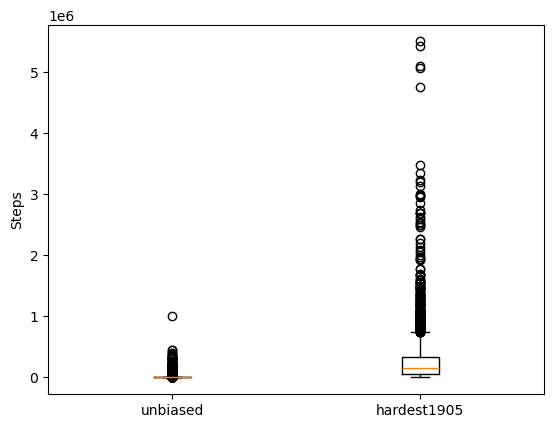

In [5]:
import matplotlib.pyplot as plt
# Plot two box plots side by side
plt.boxplot([unbi, hard])

# Add labels and title
#plt.title("Two Box Plots Side by Side")
plt.xticks([1, 2], ['unbiased', 'hardest1905'])  # Set x-axis labels
plt.ylabel("Steps")

# Show the plot
plt.show()

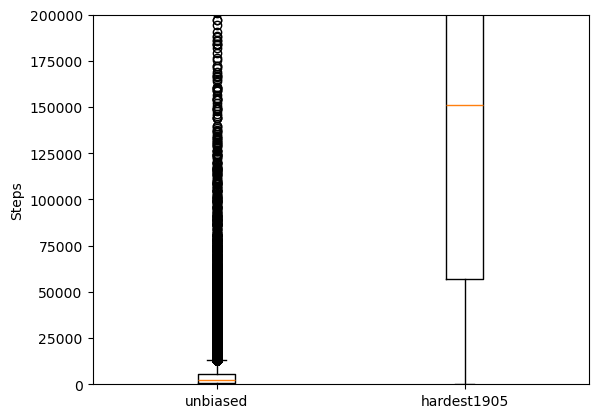

In [46]:
# Set y-axis limits
plt.ylim(0, 200000)  # Adjust the range as needed

# Plot two box plots side by side
plt.boxplot([unbi, hard])

# Add labels and title
#plt.title("Two Box Plots Side by Side")
plt.xticks([1, 2], ['unbiased', 'hardest1905'])  # Set x-axis labels
plt.ylabel("Steps")

# Show the plot
plt.show()

In [6]:
import numpy as np
# Define the percentiles
percentiles = [0, 25, 50, 75, 100]

# Calculate percentiles for each dataset
percentiles_unbi = np.percentile(unbi, percentiles)
percentiles_hard = np.percentile(hard, percentiles)
std_unbi = np.std(unbi)
std_hard = np.std(hard)

# Print the results
print("Percentiles for unbiased:")
for p, value in zip(percentiles, percentiles_unbi):
    print(f"{p}th percentile: {value}")
print(f"Standard deviation for unbi: {std_unbi}")

print("\nPercentiles for hard:")
for p, value in zip(percentiles, percentiles_hard):
    print(f"{p}th percentile: {value}")
print(f"Standard deviation for unbi: {std_hard}")

Percentiles for unbiased:
0th percentile: 57.0
25th percentile: 773.0
50th percentile: 2108.0
75th percentile: 5647.5
100th percentile: 1004620.0
Standard deviation for unbi: 15601.559439744562

Percentiles for hard:
0th percentile: 77.0
25th percentile: 56756.0
50th percentile: 150899.0
75th percentile: 331841.25
100th percentile: 5492954.0
Standard deviation for unbi: 421085.83049744746
